In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
mgaussian_acc={}

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(train_x,train_y),(test_x,test_y)=tf.keras.datasets.fashion_mnist.load_data()


In [3]:
count_class=np.bincount(train_y)
print(count_class)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


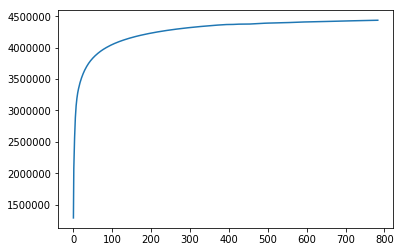

In [11]:
##PCA analysis
y=np.copy(train_y)
x=np.copy(train_x)
x_test=np.copy(test_x)
y_test=np.copy(test_y)
length_x=len(x)
x=x.reshape([len(x),len(x[0])*len(x[0])])
x_test=x_test.reshape([len(x_test),len(x_test[0])*len(x_test[0])])
mean_x=x.T.mean(axis=1)
x_test=x_test-x_test.T.mean(axis=1)
x=x-mean_x
cov_x=np.dot(x.T,x)
cov_x=cov_x/len(x)
eig_value,eig_vector=np.linalg.eig(cov_x)
cum_eigenvalue=np.cumsum(eig_value)
plt.plot(cum_eigenvalue)
new_x=np.dot(eig_vector.T,x.T)
x_test=np.dot(eig_vector.T,x_test.T)
number_pca=400
new_x=new_x[0:number_pca][:]
x_test=x_test[0:number_pca][:]
x_test=x_test.T
new_x=new_x.T

In [12]:
## multivariate gaussian distribution-----bayesian classifier
u_mgaussian=[]
cov_mgaussian=[]
for i in range(0,10):
    y_index=np.where(y==i)
    n_classes=np.shape(y_index)
    c=new_x[y_index].T.sum(axis=1)
    c=c/n_classes[1]
    u_mgaussian.append(c)
for i in range(0,10):
    y_index=np.where(y==i)
    n_classes=np.shape(y_index)
    c=new_x[y_index]-u_mgaussian[i]
    c=np.dot(c.T,c)/n_classes[1]
    cov_mgaussian.append(c)
inverse_cov=[]
det_cov=[]
for j in range(0,10):
    inverse_cov.append(np.linalg.inv(cov_mgaussian[j]))
    det_cov.append(np.linalg.slogdet(cov_mgaussian[j]))
length_test=len(y_test)
print(det_cov)
ans_y=[]
for i in range(0,len(x_test)):
    max=-100000000000000000
    index=-1
    for j in range(0,10):
        a_temp=x_test[i].T-u_mgaussian[j]
        alpha=np.matmul(np.matmul(a_temp.T,inverse_cov[j]),a_temp)
        temp = -((det_cov[j][0]*det_cov[j][1])+alpha)
        if(max<temp):
            max=temp
            index=j
    ans_y.append(index)
        

    



[(1.0, 2583.241105682443), (1.0, 1768.2688153121778), (1.0, 2519.7528957520312), (1.0, 2381.183445264832), (1.0, 2445.5682782785475), (1.0, 2630.7116924351667), (1.0, 2677.3974371624354), (1.0, 1790.3929608620576), (1.0, 2832.5037895134765), (1.0, 2429.543766156399)]


In [13]:

temp11=ans_y-y_test
misclassified=np.count_nonzero(temp11)
print("Accuracy for bayes clasifier using multivariate gaussian distribution for",number_pca,"features:-",1-(misclassified/len(x_test)))
mgaussian_acc[number_pca]=1-(misclassified/len(x_test))


Accuracy for bayes clasifier using multivariate gaussian distribution for 400 features:- 0.6938


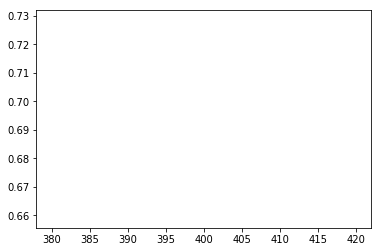

In [14]:
lists = sorted(mgaussian_acc.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

In [16]:
#### naive bayes******* gaussian distribution
u_naive=[]
std_naive=[]
for i in range(0,10):
    y_index1=np.where(y==i)
    d=new_x[y_index1].T.sum(axis=1)
    d_size=np.shape(y_index1)
    print(d)
    d=d/(d_size[1])
    d_std=np.multiply((new_x[y_index1]-d),new_x[y_index1]-d)
    d_std=d_std/(d_size[1])
    u_naive.append(d)
    std_naive.append(d_std)
    



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
